# 4장. 가장 훌륭한 예측선

[<img src="https://raw.githubusercontent.com/taehojo/taehojo.github.io/master/assets/images/linktocolab.png" align="left"/> ](https://colab.research.google.com/github/taehojo/deeplearning/blob/master/colab/ch04-colab.ipynb)

## 4. 파이썬 코딩으로 확인하는 최소 제곱

### 1. 환경 준비

In [1]:
import numpy as np

### 2. 데이터 준비

In [2]:
# 공부한 시간과 점수를 각각 x, y라는 이름의 넘파이 배열로 만듭니다.
x = np.array([2, 4, 6, 8])
y = np.array([81, 93, 91, 97]) 

#### [x와 y의 평균값]

In [3]:
#x의 평균값을 구합니다.
mx = np.mean(x)

#y의 평균값을 구합니다.
my = np.mean(y)

# 출력으로 확인합니다.
print("x의 평균값:", mx)
print("y의 평균값:", my)

x의 평균값: 5.0
y의 평균값: 90.5


#### [기울기 공식의 분모와 분자]

In [4]:
# 기울기 공식의 분모 부분입니다.
divisor = sum([(i - mx)**2 for i in x])

# 기울기 공식의 분자 부분입니다.
def top(x, mx, y, my):
    d = 0
    for i in range(len(x)):
        d += (x[i] - mx) * (y[i] - my)
    return d
dividend = top(x, mx, y, my)

# 출력으로 확인합니다.
print("분모:", divisor)
print("분자:", dividend)

분모: 20.0
분자: 46.0


### 3. 기울기와 y 절편 구하기

In [5]:
# 기울기 a를 구하는 공식입니다.
a = dividend / divisor

# y절편 b 를 구하는 공식입니다.
b = my - (mx*a)

# 출력으로 확인합니다.
print("기울기 a =", a)
print("y절편 b =", b)

기울기 a = 2.3
y절편 b = 79.0


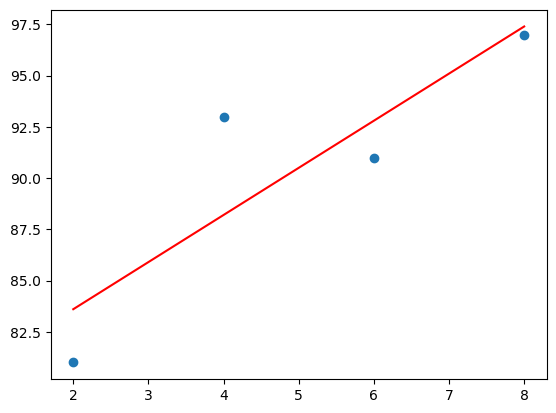

In [7]:
# 시각화
import matplotlib.pyplot as plt

r = [2, 8] # 독립 변수의 범위
# 회귀선의 공식: 2.3*x +79
plt.scatter(x, y)
plt.plot(r, [a * x + b for x in r], color='red')
plt.show()

In [8]:
# 5시간을 공부했을 때의 점수 예측
hour = 5
print("5시간 공부했을 때의 예상 점수:", a * hour + b)

5시간 공부했을 때의 예상 점수: 90.5


## 6. 파이썬 코딩으로 확인하는 평균 제곱 오차

### 1. 환경 준비

In [9]:
import numpy as np

### 2. 데이터 준비

In [10]:
#가상의 기울기 a와 y 절편 b를 정합니다.
fake_a=3
fake_b=76

#공부 시간 x와 성적 y의 넘파이 배열을 만듭니다.
x = np.array([2, 4, 6, 8])
y = np.array([81, 93, 91, 97]) 

### 3. 평균 제곱 오차 구하기

In [11]:
# y=ax + b에 가상의 a,b 값을 대입한 결과를 출력하는 함수입니다.
def predict(x): # 예측지를 구하기 위한 함수
    return fake_a * x + fake_b

# 예측 값이 들어갈 빈 리스트를 만듭니다.
predict_result = []

# 모든 x값을 한 번씩 대입하여 predict_result 리스트를 완성합니다.
for i in range(len(x)):
    predict_result.append(predict(x[i]))
    print("공부시간=%.f, 실제점수=%.f, 예측점수=%.f" % (x[i], y[i], predict(x[i])))

공부시간=2, 실제점수=81, 예측점수=82
공부시간=4, 실제점수=93, 예측점수=88
공부시간=6, 실제점수=91, 예측점수=94
공부시간=8, 실제점수=97, 예측점수=100


In [12]:
# 평균 제곱 오차 함수를 각 y값에 대입하여 최종 값을 구하는 함수입니다.
n=len(x)  
def mse(y, y_pred):
    return (1/n) * sum((y - y_pred)**2)

# 평균 제곱 오차 값을 출력합니다.
print("평균 제곱 오차: " + str(mse(y,predict_result)))

평균 제곱 오차: 11.0


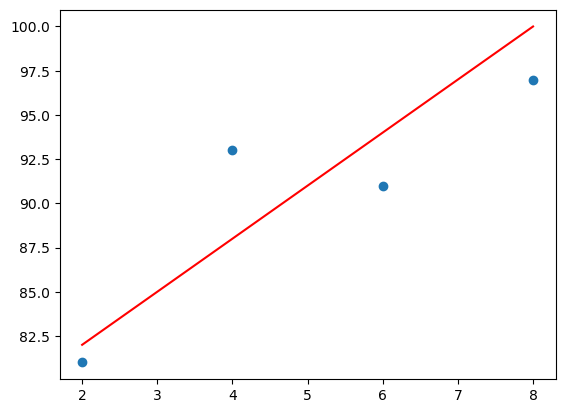

In [14]:
# 시각화
import matplotlib.pyplot as plt

plt.scatter(x, y)
r = [min(x), max(x)] # 독립 변수의 범위
plt.plot(r, [fake_a * x + fake_b for x in r], color='red')